In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Clone do repositório do YOLOv5
!git clone https://github.com/ultralytics/yolov5.git

# Instalação as dependências
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17075, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 17075 (delta 19), reused 7 (delta 7), pack-reused 17049 (from 2)
Receiving objects: 100% (17075/17075), 15.69 MiB | 26.46 MiB/s, done.
Resolving deltas: 100% (11724/11724), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 902.2/902.2 kB 16.0 MB/s eta 0:00:00


In [3]:
import os
import shutil

# Criação das pastas para o dataset
os.makedirs('/content/dataset/images/train', exist_ok=True)
os.makedirs('/content/dataset/images/val', exist_ok=True)
os.makedirs('/content/dataset/labels/train', exist_ok=True)
os.makedirs('/content/dataset/labels/val', exist_ok=True)

# Caminho das pastas no Google Drive
drive_path = '/content/drive/My Drive/'

# Copiar imagens e labels de treinamento (pasta "obj")
shutil.copytree(os.path.join(drive_path, 'obj'), '/content/dataset/images/train', dirs_exist_ok=True)
shutil.copytree(os.path.join(drive_path, 'obj'), '/content/dataset/labels/train', dirs_exist_ok=True)

# Copiar imagens e labels de validação (pasta "valid")
shutil.copytree(os.path.join(drive_path, 'valid'), '/content/dataset/images/val', dirs_exist_ok=True)
shutil.copytree(os.path.join(drive_path, 'valid'), '/content/dataset/labels/val', dirs_exist_ok=True)

'/content/dataset/labels/val'

In [4]:
dataset_yaml = """
train: /content/dataset/images/train
val: /content/dataset/images/val

nc: 2  # Número de classes
names: ['Headphones', 'Glasses']
"""

with open('/content/dataset.yaml', 'w') as f:
    f.write(dataset_yaml)

In [5]:
!python train.py --data /content/dataset.yaml --weights yolov5n.pt --epochs 100 --batch-size 8 --img 416 --patience 7 --cache

A saída de streaming foi truncada nas últimas 5000 linhas.
  with torch.cuda.amp.autocast(amp):
      22/99     0.455G    0.04412    0.01604   0.003863         20        416:  72% 192/266 [00:26<00:09,  8.05it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      22/99     0.455G    0.04411    0.01603   0.003851         12        416:  73% 193/266 [00:26<00:08,  8.28it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      22/99     0.455G     0.0441    0.01605   0.003863         30        416:  73% 193/266 [00:26<00:08,  8.28it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.a

In [6]:
!python val.py --data /content/dataset.yaml --weights runs/train/exp/weights/best.pt --img 640

val: data=/content/dataset.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 1761871 parameters, 0 gradients, 4.1 GFLOPs
val: Scanning /content/dataset/labels/val.cache... 166 images, 0 backgrounds, 0 corrupt: 100% 166/166 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 6/6 [00:06<00:00,  1.16s/it]
                   all        166        215      0.608      0.527      0.555      0.232
            Headphones        166         97      0.464      0.351      0.391       0.14
               Glasses        166     

In [7]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.5 --source /content/dataset/model_eval/im3.jpg --save-crop --save-txt

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/dataset/model_eval/im3.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 1761871 parameters, 0 gradients, 4.1 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dataset/model_eval/im3.jpg: 384x640 1 Glasses, 34.1ms
Speed: 0.4ms pre-process, 34.1ms inference, 588.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp
1 labels saved to runs/detect/exp/labels


O retreinamento foi feito com o objetivo de identificar "óculos" e "headphones".

O reconhecimento de "óculos" foi possivel, contudo o modelo não foi capaz de reconhecer os "headphones".

Pretendo retreiaar o modelo Yolo novamente com um dataset maior

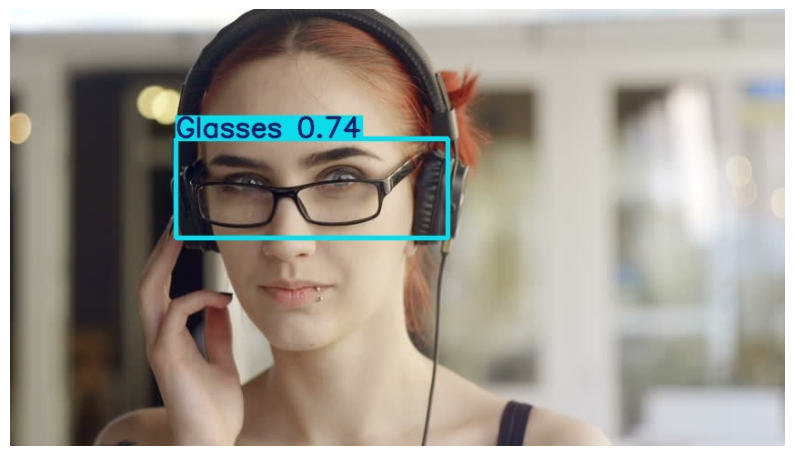

In [8]:
import cv2
import matplotlib.pyplot as plt

# Define the path to the saved image
output_image_path = 'runs/detect/exp/im3.jpg'  # Adjust this path if the default output directory changes.

# Load the image
image = cv2.imread(output_image_path)

# Convert BGR (OpenCV default) to RGB for Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [ ]:
from google.colab import files
files.download('runs/train/exp/weights/best.pt')